In [55]:
from web_crawler import WebCrawler, DataMiner
from caption_generator import ImageAnalyzer
from text_classifier_dense import *
import numpy as np
import pandas as pd
from combiner import Combiner
import os
import csv
import seaborn as sns

In [56]:
web_crawler = WebCrawler()
image_analyzer = ImageAnalyzer()
cur_file = os.getcwd()
dm = DataMiner(cur_file, web_crawler, 'http://www.bbc.com/travel?referer=https%3A%2F%2Fwww.bbc.com%2Fnews%2Flive%2Fworld-53039952')
dm.gather_text(show_status = True, mx_phrazes = 40)
dm.gather_images(web_crawler, mx_images = 10)
dm.generate_images_captions(image_analyzer)


saved to csv
 ['The easy-to-make Korean comfort food', 'Born from South Korea’s war-torn past, “army stew” is experiencing a renaissance', "The discovery rewriting Africa's past", 'How to become a better traveller', 'Italy’s beloved 3-ingredient pasta dish', "Britain's lawless 'fourth' country", 'A centuries-old healing technique', 'America’s ‘fried chicken war’', "Asia's centuries-old 'lockdown' law", 'An ancient way to save the Earth']
writing 0_21_00_48.jpg file..
writing 1_21_00_48.jpg file..
writing 2_21_00_49.jpg file..
writing 3_21_00_49.jpg file..
writing 4_21_00_50.jpg file..
writing 5_21_00_50.jpg file..
writing 6_21_00_50.jpg file..
writing 7_21_00_51.jpg file..
-- 8 files was added


c:\users\sul_s\deep_learning\lib\site-packages\tensorflow\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


['man in red shirt is standing in front of large truck',
 'man in black shirt is standing in front of crowd',
 'man in red shirt is sitting on bench in front of statue',
 'dog is running through the grass',
 'man is walking on rocky peak looking over the mountains',
 'man in red shirt is sitting on dock overlooking the water',
 'man in red shirt is walking down the street',
 'two men are sitting on the edge of dock overlooking the water']

In [57]:
text_classifier = TextClassifierDenseBBC()
text_classifier.build_model()
text_classifier.train_model(show_status = True)

combiner = Combiner(os.path.join(os.getcwd(), 'Data', 'TextFiles' ), text_classifier)
combiner.process_text_data()
text_report, image_report = combiner.get_data_report()

Epoch 1/2
51/51 [==============================] - 0s 6ms/step - loss: 0.4292 - accuracy: 0.8602 - val_loss: 0.1528 - val_accuracy: 0.9607
Epoch 2/2
14/14 [==============================] - 0s 2ms/step - loss: 0.1424 - accuracy: 0.9573
Test loss: 0.14243967831134796
Test accuracy: 0.9573033452033997


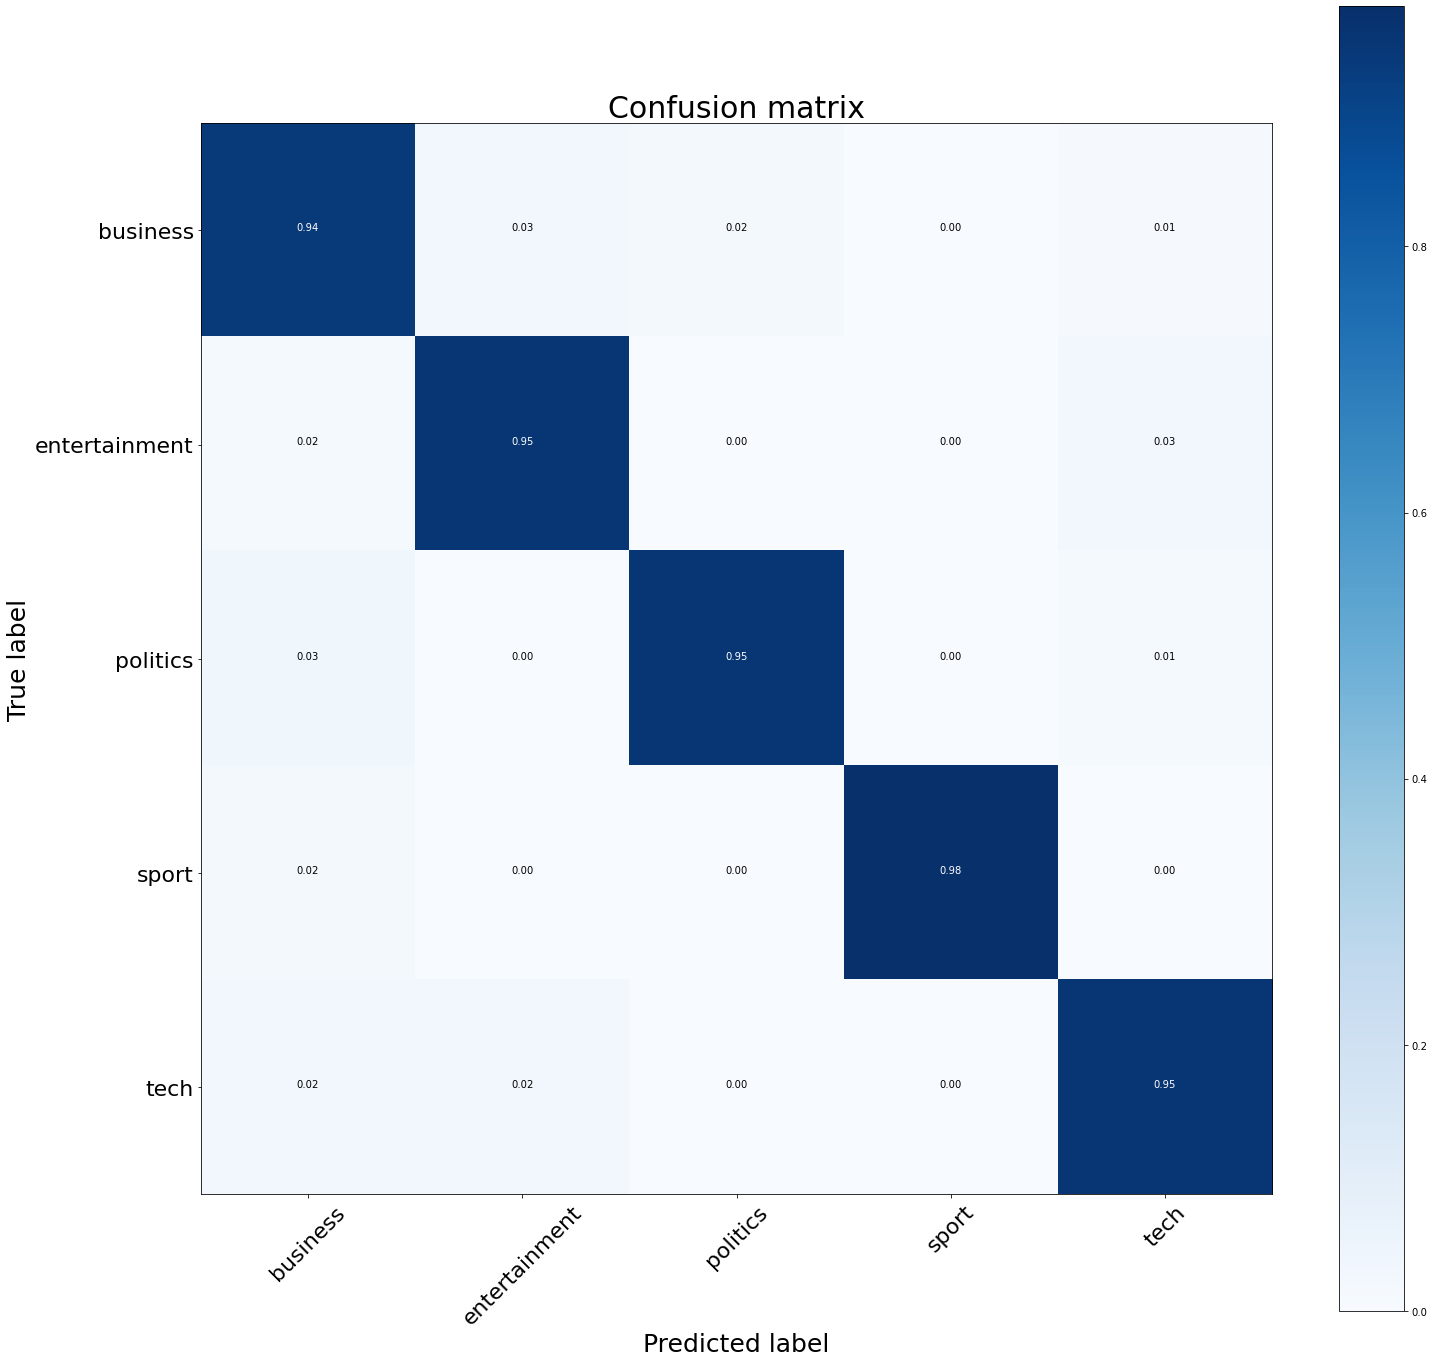

In [58]:
text_classifier.plot_confusion_matrix()

In [59]:
text_report, image_report = combiner.get_data_report()


In [62]:
text_report.describe()

,TextID,TextWeights
count,50.00000,50.0
mean,25.50000,1.0
std,14.57738,0.0
min,1.00000,1.0
25%,13.25000,1.0
50%,25.50000,1.0
75%,37.75000,1.0
max,50.00000,1.0


In [65]:
text_report.head()


,TextID,TextClasses,TextWeights,TextPredictions
0,1,"[[0.21870603, 0.17937876, 0.18187875, 0.250390...",1,sport
1,2,"[[0.21870603, 0.17937876, 0.18187875, 0.250390...",1,sport
2,3,"[[0.20618187, 0.188254, 0.22309656, 0.22355345...",1,sport
3,4,"[[0.20618187, 0.188254, 0.22309656, 0.22355345...",1,sport
4,5,"[[0.22839066, 0.19274959, 0.20440526, 0.203212...",1,business


In [66]:
image_report.head()

,ImageID,ImageClasses,ImageWeights,ImageCaptions,ImageClassesByCaptions,ImagePredictions
0,1,"[[0.21454, 0.3066033, 0.14401516, 0.19496962, ...",1,Empty,None,entertainment
1,2,"[[0.21454, 0.3066033, 0.14401516, 0.19496962, ...",1,Empty,None,entertainment
2,3,"[[0.19257933, 0.33044404, 0.14240974, 0.197299...",1,Empty,None,entertainment
3,4,"[[0.19257933, 0.33044404, 0.14240974, 0.197299...",1,Empty,None,entertainment
4,5,"[[0.1721722, 0.3279594, 0.1590456, 0.20961007,...",1,Empty,None,entertainment


In [111]:
def get_mid_from_data(data, data_class):
    res = np.zeros(5)
    count = 0
    for item in data[data_class]:
        res += item[0].astype(float)
        count += 1
    return res / count 

In [119]:
mid_data_from_image = get_mid_from_data(image_report, 'ImageClasses')
mid_data_from_text = get_mid_from_data(text_report, 'TextClasses')
predicted_classes = text_classifier.encoder.classes_

In [134]:
def bar_graph_from_data(text_data, image_data, labels):
    local_dataframe = pd.DataFrame({'image data':image_data,
                                    'text data': text_data
                                   }, index = labels)
    local_dataframe.plot.bar(rot = 1)
    
    

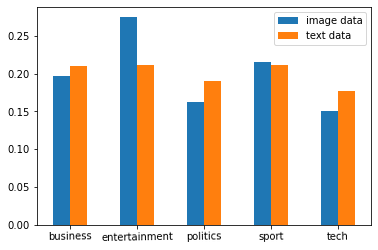

In [135]:
bar_graph_from_data(mid_data_from_text, mid_data_from_image, predicted_classes)